# 합성곱 신경망 CNN - 이미지 분석에 주로 사용

In [55]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [32]:
# GPU 확인 코드
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"사용 가능한 GPU 장치: {gpus}")
else:
    print("GPU 없음, CPU로 학습")

사용 가능한 GPU 장치: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


MNIST 손글씨 데이터 불러오기

In [33]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [34]:
# MNIST 손글씨 데이터를 불러와 학습셋, 테스트셋으로 저장
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [35]:
X_train.shape

(60000, 28, 28)

In [36]:
X_test.shape

(10000, 28, 28)

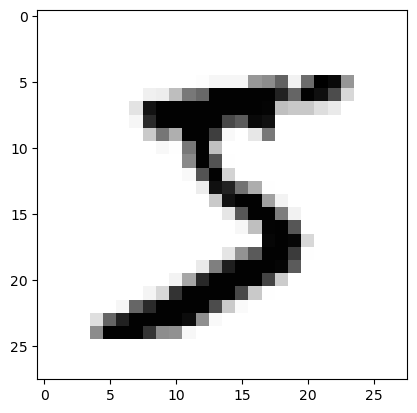

In [37]:
plt.imshow(X_train[0], cmap='Grays')
plt.show()

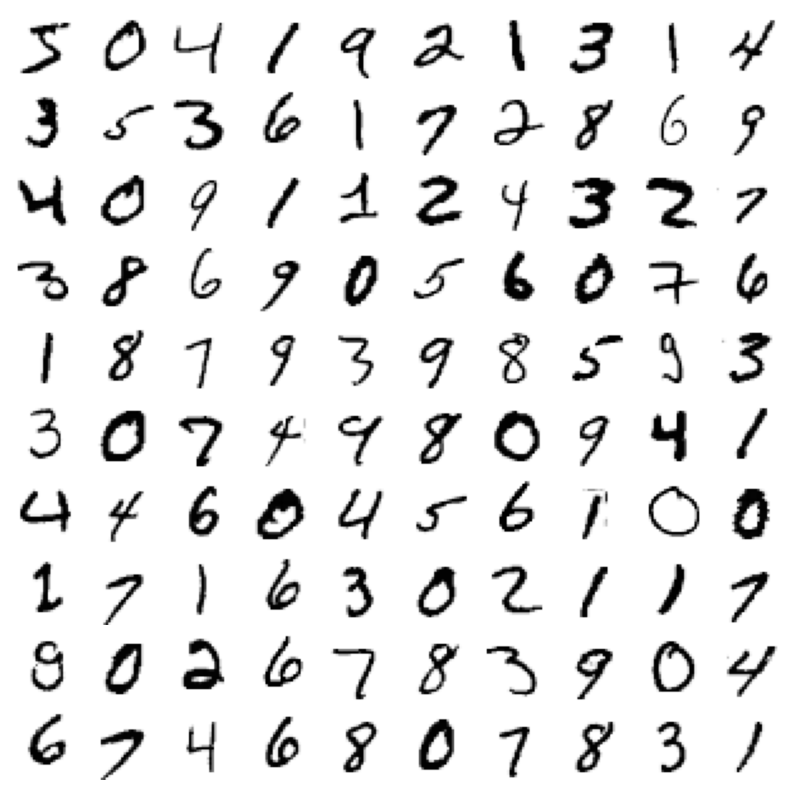

In [38]:
fig, axes = plt.subplots(10, 10, figsize=(10,10))
axes = axes.ravel()

for i in range(100):
    axes[i].imshow(X_train[i], cmap="Greys")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# 첫번째 글자 이미지의 데이터
* 컴퓨터는 색을 0-255의 범위로 표현  RGB(0, 0, 0)

In [39]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')


0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [40]:
for idx in range(1,10):
    for x in X_train[idx]:
        for i in x:
            sys.stdout.write("%-3s" % i)
        sys.stdout.write('\n')
    print(end="\n\n")

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  51 15925315950 0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  48 2382522522522370  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  54 22725325223923325257 6  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  10 60 22425225325220284 2522531220  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  16325225225225325225296 1892531670  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  51 23825325319011425322847 79 2551680  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  48 23825225217912 75 12121 0  0  25324350 0  0  0  0  0  
0  0  0  0  0  0  0  0  38 16525323320884 0  0  0  0  0  0  25325

# 이미지 데이터 훈련을 위한 전처리
* 정규화 = / 255 => 0-1범위로 변환, 또는 -1-1범위로 변환
* y(종속변수) = one-hot encoding => to_categorical()

# 일반적인 DNN을 이용해 이미지 분석하기

In [41]:
X_train.shape[0]

60000

In [42]:
28 * 28

784

In [43]:
X_train = X_train.reshape(X_train.shape[0], 784)

In [44]:
# pd.DataFrame(X_train)

In [45]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [46]:
X_train = X_train.astype('float64')

# 이미지 데이터 정규화 / 255

In [47]:
# 이미지 데이터 정규화 / 255
X_train = X_train / 255

In [48]:
# for i in pd.DataFrame(X_train).iloc[0,:]:
#     print(i)

In [49]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 종속변수 One-hot encoding

In [50]:
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

In [53]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# DNN 훈련 및 예측

In [54]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,457,162
Trainable params: 1,457,162
Non-trainable params: 0
_________________________________________________________________


2024-09-12 12:03:49.141609: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-12 12:03:49.143363: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) RX Vega 11 Graphics)
2024-09-12 12:03:49.809642: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 12:03:49.809695: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-12 12:03:49.809721: I tensorflow/core/common_runtime/pluggable_device/pluggab

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelpath = "./model/MNIST_MLP.keras"
checkpoint = ModelCheckpoint(filepath=modelpath, save_best_only=True)
earlystop = EarlyStopping(patience=10)
history = model.fit(X_train, y_train, validation_split=0.25, epochs=50, batch_size=1000,
                   callbacks=[earlystop, checkpoint])
print("Test 정확도:", model.evaluate(X_test, y_test))

Epoch 1/50


2024-09-12 12:11:27.805965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - ETA: 0s - loss: 0.4881 - accuracy: 0.8620

2024-09-12 12:11:30.763431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 4s 50ms/step - loss: 0.4881 - accuracy: 0.8620 - val_loss: 0.1920 - val_accuracy: 0.9424
Epoch 2/50
45/45 [==============================] - 2s 45ms/step - loss: 0.1495 - accuracy: 0.9556 - val_loss: 0.1338 - val_accuracy: 0.9611
Epoch 3/50
45/45 [==============================] - 2s 41ms/step - loss: 0.0930 - accuracy: 0.9724 - val_loss: 0.1157 - val_accuracy: 0.9647
Epoch 4/50
45/45 [==============================] - 2s 40ms/step - loss: 0.0605 - accuracy: 0.9824 - val_loss: 0.0942 - val_accuracy: 0.9707
Epoch 5/50
45/45 [==============================] - 2s 41ms/step - loss: 0.0394 - accuracy: 0.9891 - val_loss: 0.0887 - val_accuracy: 0.9730
Epoch 6/50
45/45 [==============================] - 2s 40ms/step - loss: 0.0278 - accuracy: 0.9924 - val_loss: 0.0884 - val_accuracy: 0.9751
Epoch 7/50
45/45 [==============================] - 2s 40ms/step - loss: 0.0198 - accuracy: 0.9944 - val_loss: 0.0867 - val_accuracy: 0.9754
Epoch 8/50
45/45 [======

2024-09-12 12:11:59.094116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-12 12:11:59.136544: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 12:11:59.136617: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


313/313 [==============================] - 3s 10ms/step - loss: 0.0800 - accuracy: 0.9818
Test 정확도: [0.08000845462083817, 0.9817999601364136]


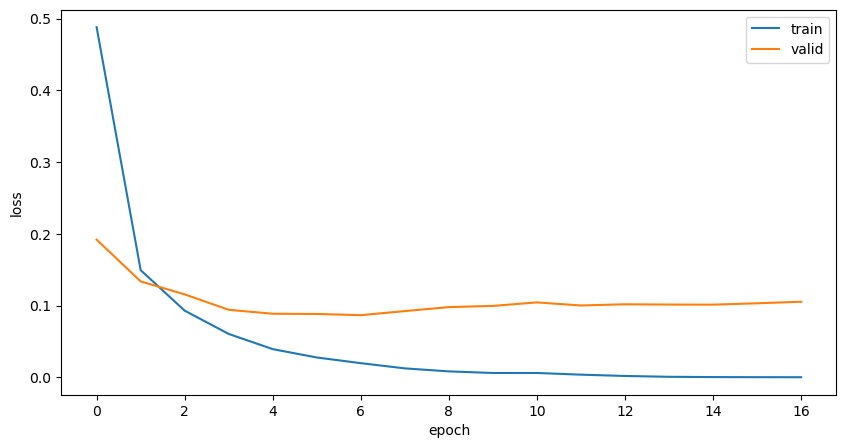

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'valid'])
plt.show()

# CNN 합성곱 신경망으로 이미지 분석하기

In [59]:
# MNIST 손글씨 데이터를 불러와 학습셋, 테스트셋으로 저장
(X_train2, y_train2), (X_test2, y_test2) = mnist.load_data()

In [60]:
X_train2.shape

(60000, 28, 28)

# CNN을 위한 데이터 전처리

In [62]:
X_train2 = X_train2.reshape(X_train2.shape[0], 28, 28, 1).astype('float32') / 255
X_test2 = X_test2.reshape(X_test2.shape[0], 28, 28, 1).astype('float32') / 255
y_train2 = to_categorical(y_train2)
y_test2 = to_categorical(y_test2)

In [67]:
X_train2.shape

(60000, 28, 28, 1)

In [66]:
y_train2[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# CNN네트워크 생성 후 분석

In [69]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))  # dropout 과적합을 막기 위해서 추가
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

In [72]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelpath = "./model/MNIST_CNN.keras"
checkpoint = ModelCheckpoint(filepath=modelpath, save_best_only=True)
earlystop = EarlyStopping(patience=10)
history2 = model.fit(X_train2, y_train2, validation_split=0.25, epochs=50, batch_size=2000,
                   callbacks=[earlystop, checkpoint])
print("Test 정확도:", model.evaluate(X_test2, y_test2))

Epoch 1/50


2024-09-12 13:36:21.872279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-12 13:36:22.001328: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 13:36:22.001473: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


23/23 [==============================] - ETA: 0s - loss: 0.1026 - accuracy: 0.9699

2024-09-12 13:36:30.910455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-12 13:36:30.958843: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 13:36:30.959014: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


23/23 [==============================] - 11s 416ms/step - loss: 0.1026 - accuracy: 0.9699 - val_loss: 0.1027 - val_accuracy: 0.9723
Epoch 2/50
23/23 [==============================] - 11s 435ms/step - loss: 0.0936 - accuracy: 0.9717 - val_loss: 0.1026 - val_accuracy: 0.9715
Epoch 3/50
23/23 [==============================] - 10s 414ms/step - loss: 0.0931 - accuracy: 0.9718 - val_loss: 0.1018 - val_accuracy: 0.9725
Epoch 4/50
23/23 [==============================] - 10s 430ms/step - loss: 0.0916 - accuracy: 0.9730 - val_loss: 0.1003 - val_accuracy: 0.9733
Epoch 5/50
23/23 [==============================] - 9s 406ms/step - loss: 0.0875 - accuracy: 0.9743 - val_loss: 0.1033 - val_accuracy: 0.9725
Epoch 6/50
23/23 [==============================] - 9s 409ms/step - loss: 0.0895 - accuracy: 0.9734 - val_loss: 0.0991 - val_accuracy: 0.9725
Epoch 7/50
23/23 [==============================] - 9s 408ms/step - loss: 0.0877 - accuracy: 0.9740 - val_loss: 0.1027 - val_accuracy: 0.9725
Epoch 8/50
23